In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
import laser

%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport laser

<Container object of 20 artists>

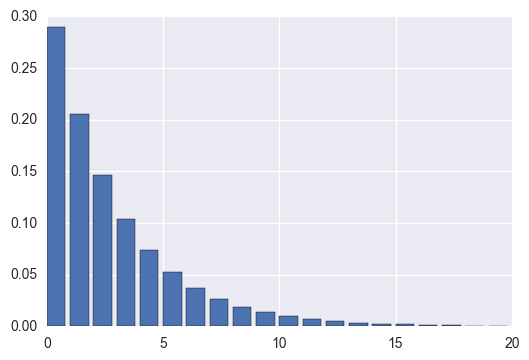

In [30]:
hvkt = - np.log(0.7106)
fig, ax = plt.subplots()
ax.bar(range(20), laser.boltzmann(hvkt, 20))

<Container object of 50 artists>

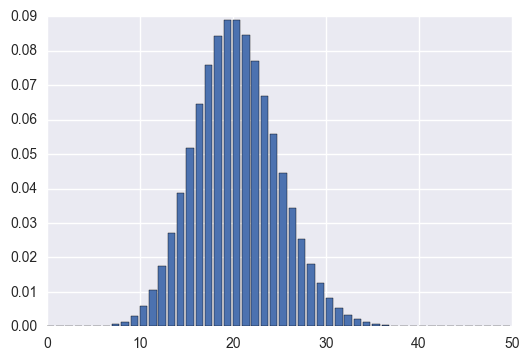

In [59]:
fig, ax = plt.subplots()
N_max = 50
n_list = np.arange(N_max)
ax.bar(n_list, laser.poisson(20, N_max))

In [4]:
import numpy as np

In [4]:
np.zeros([2,3])

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [5]:
np.zeros(4)

array([ 0.,  0.,  0.,  0.])

In [6]:
np.log2(2)

1.0

In [7]:
l = range(10)

In [8]:
x = [i for i in l if i > 5]

In [9]:
x

[6, 7, 8, 9]

In [1]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2]
    return f

In [2]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.5
# Spring constants
k1 = 8.0
k2 = 40.0
# Natural lengths
L1 = 0.5
L2 = 1.0
# Friction coefficients
b1 = 0.8
b2 = 0.5

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.5
y1 = 0.0
x2 = 2.25
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('two_springs.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print >> f, t1, w1[0], w1[1], w1[2], w1[3]

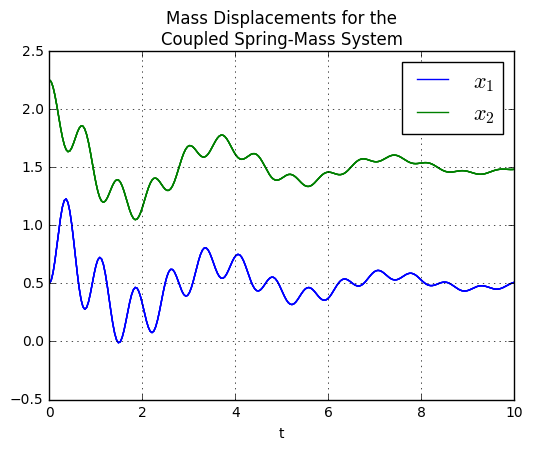

In [6]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

t, x1, xy, x2, y2 = loadtxt('two_springs.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Mass Displacements for the\nCoupled Spring-Mass System')
# savefig('two_springs.png', dpi=100)

plt.show()

In [1]:
from qutip import *

In [3]:
state1 = fock(5, 0)

In [5]:
state.type == 'ket'

True

In [6]:
state = coherent_dm(5, 1)

In [7]:
state

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[ 0.36791117  0.36774407  0.26105441  0.14620658  0.08826704]
 [ 0.36774407  0.36757705  0.26093584  0.14614018  0.08822695]
 [ 0.26105441  0.26093584  0.18523331  0.10374209  0.06263061]
 [ 0.14620658  0.14614018  0.10374209  0.05810197  0.035077  ]
 [ 0.08826704  0.08822695  0.06263061  0.035077    0.0211765 ]]

In [9]:
qdiags

Quantum object: dims = [[11], [11]], shape = (11, 11), type = oper, isherm = True
Qobj data =
[[-5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -4.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -3.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]

In [10]:
qdiags([1, 2, 3], offsets=0)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  3.]]

In [24]:
import numpy as np
qobjs = np.array([qdiags([1, 2, 3], offsets=0) for i in range(3)])

In [22]:
qobjs[1]

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  3.]]

In [27]:
rho = coherent_dm(5, 0.5)

rho

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[  7.78800837e-01   3.89399874e-01   1.37680507e-01   3.96822144e-02
    1.03552599e-02]
 [  3.89399874e-01   1.94699665e-01   6.88401575e-02   1.98410795e-02
    5.17762272e-03]
 [  1.37680507e-01   6.88401575e-02   2.43398841e-02   7.01523054e-03
    1.83065731e-03]
 [  3.96822144e-02   1.98410795e-02   7.01523054e-03   2.02192662e-03
    5.27631232e-04]
 [  1.03552599e-02   5.17762272e-03   1.83065731e-03   5.27631232e-04
    1.37687844e-04]]

In [30]:
from scipy.sparse import coo_matrix


<5x5 sparse matrix of type '<type 'numpy.complex128'>'
	with 25 stored elements in COOrdinate format>

In [33]:
rho

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[  7.78800837e-01   3.89399874e-01   1.37680507e-01   3.96822144e-02
    1.03552599e-02]
 [  3.89399874e-01   1.94699665e-01   6.88401575e-02   1.98410795e-02
    5.17762272e-03]
 [  1.37680507e-01   6.88401575e-02   2.43398841e-02   7.01523054e-03
    1.83065731e-03]
 [  3.96822144e-02   1.98410795e-02   7.01523054e-03   2.02192662e-03
    5.27631232e-04]
 [  1.03552599e-02   5.17762272e-03   1.83065731e-03   5.27631232e-04
    1.37687844e-04]]

In [35]:
rho_matrix = rho.data.toarray()
rho_matrix

array([[  7.78800837e-01+0.j,   3.89399874e-01+0.j,   1.37680507e-01+0.j,
          3.96822144e-02+0.j,   1.03552599e-02+0.j],
       [  3.89399874e-01+0.j,   1.94699665e-01+0.j,   6.88401575e-02+0.j,
          1.98410795e-02+0.j,   5.17762272e-03+0.j],
       [  1.37680507e-01+0.j,   6.88401575e-02+0.j,   2.43398841e-02+0.j,
          7.01523054e-03+0.j,   1.83065731e-03+0.j],
       [  3.96822144e-02+0.j,   1.98410795e-02+0.j,   7.01523054e-03+0.j,
          2.02192662e-03+0.j,   5.27631232e-04+0.j],
       [  1.03552599e-02+0.j,   5.17762272e-03+0.j,   1.83065731e-03+0.j,
          5.27631232e-04+0.j,   1.37687844e-04+0.j]])

In [36]:
np.diag(rho_matrix)

array([  7.78800837e-01+0.j,   1.94699665e-01+0.j,   2.43398841e-02+0.j,
         2.02192662e-03+0.j,   1.37687844e-04+0.j])

In [32]:
rho.data.toarray().reshape(-1)

array([  7.78800837e-01+0.j,   3.89399874e-01+0.j,   1.37680507e-01+0.j,
         3.96822144e-02+0.j,   1.03552599e-02+0.j,   3.89399874e-01+0.j,
         1.94699665e-01+0.j,   6.88401575e-02+0.j,   1.98410795e-02+0.j,
         5.17762272e-03+0.j,   1.37680507e-01+0.j,   6.88401575e-02+0.j,
         2.43398841e-02+0.j,   7.01523054e-03+0.j,   1.83065731e-03+0.j,
         3.96822144e-02+0.j,   1.98410795e-02+0.j,   7.01523054e-03+0.j,
         2.02192662e-03+0.j,   5.27631232e-04+0.j,   1.03552599e-02+0.j,
         5.17762272e-03+0.j,   1.83065731e-03+0.j,   5.27631232e-04+0.j,
         1.37687844e-04+0.j])

In [37]:
'rho' is 'rho'

True

In [7]:
np.exp(1)

2.7182818284590451